In [24]:
## Summary 
# Three observable trends
# age
#fix the column names for age

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [26]:
df = pd.read_json('purchase_data.json')

### Total Number of Players and Player Count

In [27]:
df.SN.nunique()

573

## Purchasing Analysis
#### Number of Unique Items

In [28]:
df['Item ID'].nunique()

183

#### Average Purchase Price

In [29]:
'${:.2f}'.format(df.Price.mean())

'$2.93'

#### Total Number of Purchases

In [30]:
df.shape[0]

780

#### Total Revenue

In [31]:
df.Price.sum()

2286.33

## Gender Demographics

#### Count of players by gender

In [32]:
df.groupby(['SN', 'Gender']).count().reset_index()['Gender'].value_counts()

Male                     465
Female                   100
Other / Non-Disclosed      8
Name: Gender, dtype: int64

#### Percentage of players by gender

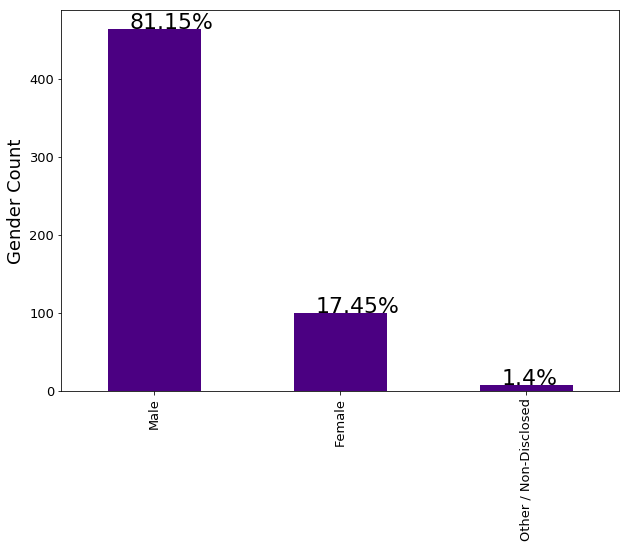

In [33]:
ax2 = df.groupby(['SN', 'Gender']).count().reset_index()['Gender'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="indigo", fontsize=13);
ax2.set_alpha(0.8)
ax2.set_ylabel("Gender Count", fontsize=18);
ax2.set_yticks([i for i in range(0,500,100)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax2.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()+.12, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='black')

## Gender Purchasing Analysis

In [34]:
df.groupby(['Gender', 'SN']).count().reset_index()['Gender'].value_counts()
normed = df.groupby(['Gender', 'SN']).count().reset_index()['Gender'].value_counts(normalize=True)
absolute = df.groupby(['Gender', 'SN']).count().reset_index()['Gender'].value_counts(normalize=False)
gdf = pd.concat([normed, absolute], axis=1)

In [35]:
df_gender = df.groupby('Gender').agg(['sum', 'mean', 'count'])
df_gender.index

Index(['Female', 'Male', 'Other / Non-Disclosed'], dtype='object', name='Gender')

In [36]:
level0 = df_gender.columns.get_level_values(0)
level1 = df_gender.columns.get_level_values(1)
df_gender.columns = level0 + ' ' + level1
# df_gender = df_gender[['sum', 'mean', 'count']]

In [37]:
df_gender

,Age sum,Age mean,Age count,Item ID sum,Item ID mean,Item ID count,Price sum,Price mean,Price count
Gender,,,,,,,,,
Female,3068,22.558824,136,11983,88.110294,136,382.91,2.815515,136
Male,14360,22.685624,633,57965,91.571880,633,1867.68,2.950521,633
Other / Non-Disclosed,301,27.363636,11,1261,114.636364,11,35.74,3.249091,11


In [38]:
df_gender = df_gender[['Price sum', 'Price mean', 'Price count']]

In [39]:
df_gender

,Price sum,Price mean,Price count
Gender,,,
Female,382.91,2.815515,136
Male,1867.68,2.950521,633
Other / Non-Disclosed,35.74,3.249091,11


In [40]:
df_gender = pd.concat([df_gender,absolute], axis=1)
df_gender['Normalized'] = df_gender['Price sum'] / df_gender.Gender

In [41]:
df_gender

,Price sum,Price mean,Price count,Gender,Normalized
Female,382.91,2.815515,136,100,3.829100
Male,1867.68,2.950521,633,465,4.016516
Other / Non-Disclosed,35.74,3.249091,11,8,4.467500


## Age Demographics

In [42]:
import seaborn as sns

In [43]:
age_df = df[['Age', 'SN']].drop_duplicates()

In [44]:
age_df.shape

(573, 2)

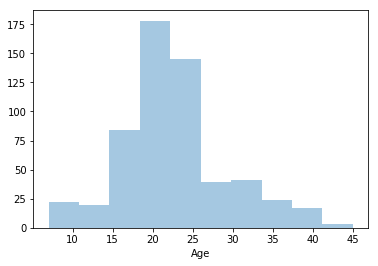

In [45]:
sns.distplot(age_df['Age'], bins=10, kde=False)

In [46]:
ages = [0, 9.9, 14.9, 19.9, 24.9, 29.90, 34.90, 39.90, 99999]
age_groups = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

In [47]:
df['Age_Group'] = pd.cut(df['Age'], ages, labels = age_groups)

age_df['Age_Group'] = pd.cut(age_df['Age'], ages, labels=age_groups)

age_out = pd.concat([age_df.Age_Group.value_counts(normalize=True),\
  age_df.Age_Group.value_counts()], axis=1)
 
age_out.to_dict()['Age_Group']

age_norm = df.groupby('Age_Group').agg(['sum', 'mean', 'count'])['Price']
age_norm.reset_index(inplace=True)

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  import sys


In [48]:
age_norm["unique_buyers"] = age_norm["Age_Group"].map(lambda x: age_out.to_dict()['Age_Group'].get(x))

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [49]:
age_norm['normed_mean'] = age_norm['sum'] / age_norm['unique_buyers'].astype('float')

In [71]:
age_norm.rename(columns={'count': 'total_purchase_count', 'mean': 'ave_purchase_price','sum': 'total_purchase_value'})

,Age_Group,total_purchase_value,ave_purchase_price,total_purchase_count,unique_buyers,normed_mean
0,<10,83.46,2.980714,28,19,4.392632
1,10-14,96.95,2.770000,35,23,4.215217
2,15-19,386.42,2.905414,133,100,3.864200
3,20-24,978.77,2.913006,336,259,3.779035
4,25-29,370.33,2.962640,125,87,4.256667
5,30-34,197.25,3.082031,64,47,4.196809
6,35-39,119.40,2.842857,42,27,4.422222
7,40+,53.75,3.161765,17,11,4.886364


## Top Spenders

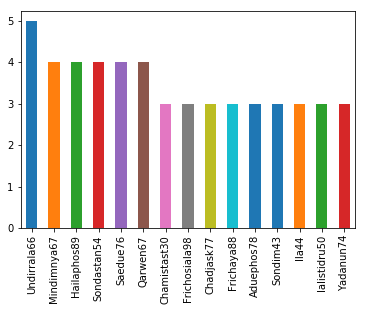

In [51]:
df['SN'].value_counts().head(15).plot.bar();

**Since the value count is the same for the 2nd[1] item and the 6th[5] spenders, I included all of those spenders.**

In [52]:
top_spenders = list(df['SN'].value_counts()[:6].to_dict().keys())

In [53]:
mask_spend = df['SN'].isin(top_spenders)

In [54]:
top_spenders_df = df[mask_spend]

In [55]:
top_spender_purchase_analysis = top_spenders_df.groupby('SN').Price.agg(['count', 'mean', 'sum'])

In [56]:
top_spender_purchase_analysis = top_spender_purchase_analysis.rename(columns={\
            'count': 'Purchase Count', 'mean': 'Ave Purchase Price','sum': 'Total Purchase Value'})
top_spender_purchase_analysis

,Purchase Count,Ave Purchase Price,Total Purchase Value
SN,,,
Hailaphos89,4,1.4675,5.87
Mindimnya67,4,3.1850,12.74
Qarwen67,4,2.4925,9.97
Saedue76,4,3.3900,13.56
Sondastan54,4,2.5600,10.24
Undirrala66,5,3.4120,17.06


## Most Popular Items

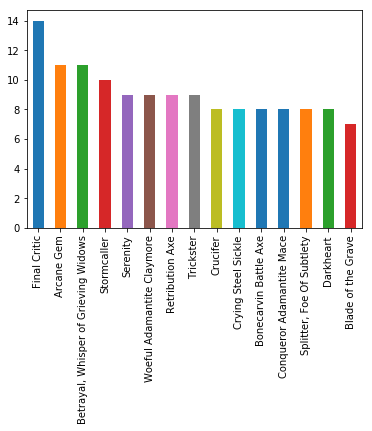

In [57]:
df['Item Name'].value_counts().head(15).plot.bar();

**Since the value count is the same for the 5th item and the 8th items, I included those in top items.**

In [58]:
top_items = list(df['Item Name'].value_counts()[:8].to_dict().keys())


In [59]:
top_items

['Final Critic',
 'Arcane Gem',
 'Betrayal, Whisper of Grieving Widows',
 'Stormcaller',
 'Serenity',
 'Woeful Adamantite Claymore',
 'Retribution Axe',
 'Trickster']

In [60]:
mask = df['Item Name'].isin(top_items)

In [61]:
top_items_df = df[mask]

In [62]:
top_items_df.sort_values(['Item Name']).head()

,Age,Gender,Item ID,Item Name,Price,SN,Age_Group
171,21,Male,84,Arcane Gem,2.23,Stryanastip77,20-24
742,26,Male,84,Arcane Gem,2.23,Inguron55,25-29
354,20,Male,84,Arcane Gem,2.23,Mindirra92,20-24
338,17,Male,84,Arcane Gem,2.23,Lisossanya98,15-19
416,25,Male,84,Arcane Gem,2.23,Hiarideu73,25-29


In [63]:
item_purchase_analysis = top_items_df.groupby('Item Name').Price.agg(['count', 'mean', 'sum']).sort_values\
    (by='count', ascending=False)

In [64]:
item_purchase_analysis = item_purchase_analysis.rename(columns={\
            'count': 'Purchase Count', 'mean': 'Ave Purchase Price','sum': 'Total Purchase Value'})
item_purchase_analysis
#sort by purchase count

,Purchase Count,Ave Purchase Price,Total Purchase Value
Item Name,,,
Final Critic,14,2.757143,38.60
Arcane Gem,11,2.230000,24.53
"Betrayal, Whisper of Grieving Widows",11,2.350000,25.85
Stormcaller,10,3.465000,34.65
Retribution Axe,9,4.140000,37.26
Serenity,9,1.490000,13.41
Trickster,9,2.070000,18.63
Woeful Adamantite Claymore,9,1.240000,11.16


## Most Profitable Items

In [81]:
most_profitable = df.groupby(['Item Name', 'Item ID', 'Price'])['Price'].agg(['sum', 'count']).\
  sort_values(by='sum', ascending=False)

In [82]:
most_profitable.loc['Stormcaller']

,,sum,count
Item ID,Price,,
30,4.15,20.75,5
180,2.78,13.90,5


In [77]:
most_profitable.loc['Final Critic']

,,Total Purchase Value,Purchase Count
Item ID,Price,,
101,4.62,27.72,6
92,1.36,10.88,8


In [74]:
most_profitable = most_profitable.rename(columns={\
            'count': 'Purchase Count', 'sum': 'Total Purchase Value'})
most_profitable

,,,Total Purchase Value,Purchase Count
Item Name,Item ID,Price,,
Retribution Axe,34,4.14,37.26,9
Spectral Diamond Doomblade,115,4.25,29.75,7
Orenmir,32,4.95,29.70,6
Singed Scalpel,103,4.87,29.22,6
"Splitter, Foe Of Subtlety",107,3.61,28.88,8
Final Critic,101,4.62,27.72,6
"Thorn, Satchel of Dark Souls",7,4.51,27.06,6
Fiery Glass Crusader,145,4.45,26.70,6
"Betrayal, Whisper of Grieving Widows",39,2.35,25.85,11


In [72]:
#why don't Final Critic and Stormcaller show up in this group??